See how you can improve the above results. Suggestions:

- Use 'Lemmatization' or 'Stemming' for data pre-proccessing
- Use algorithms other than NB for prediction
- Do more data cleaning (e.g. remove punctuation from text)
- Use N-gram with sentiment analysis

In [16]:
import pandas as pd
data=pd.read_csv('train.tsv', sep='\t')
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


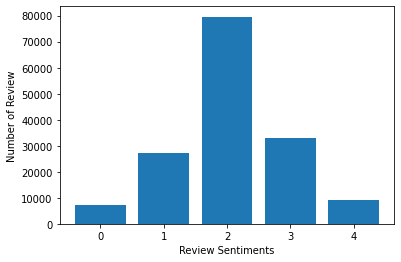

In [ ]:
from matplotlib import pyplot as plt
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

Now I am expected to use Lemmatization or Stemming for dataprocessing

In [ ]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
# tokenizer to remove unwanted elements from the data like symbols and numbers
# RegexpTokenizer is a tokenizer that splits a string using a regular expression
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

#cv = nltk.word_tokenizer(lowercase=True,stop_words='english', tokenizer = token.tokenize)
#text_counts= cv.fit_transform(data['Phrase'])
#text_counts

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
#Defining stop_words and lemmatizer
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

In [ ]:
#Defining clean_text function
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9]+',' ',text)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [ ]:
#Creating new column for processed reviews
data['Processed_Phrase'] = data.Phrase.apply(lambda x: clean_text(x))

In [ ]:
#Deploying SVM model 
#Importing libraries
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
#Defining input and target variable
x = data['Processed_Phrase']
y = data['Sentiment']

In [ ]:
#Training and splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Vectorization and Bag of words method with default parameters
count_vect = CountVectorizer().fit(data['Processed_Phrase'].values.astype('U'))
bow_train = count_vect.transform(X_train.values.astype('U'))
bow_test = count_vect.transform(X_test.values.astype('U'))


In [15]:
#instantiate the model 
SVM = SVC()

# fit the model with pre-processed data
SVM.fit(bow_train, y_train)

#perform classification and prediction on samples in tf_test
predicted_SVM = SVM.predict(bow_test)
print(classification_report(y_test, predicted_SVM))


              precision    recall  f1-score   support

           0       0.56      0.26      0.35      1504
           1       0.56      0.46      0.50      5453
           2       0.71      0.87      0.78     15982
           3       0.59      0.52      0.55      6441
           4       0.62      0.29      0.40      1832

    accuracy                           0.66     31212
   macro avg       0.61      0.48      0.52     31212
weighted avg       0.65      0.66      0.64     31212



The overall accuracy rate is 66% which somewhat better than 58.65% we got during the example in NLP lesson.